<a href="https://colab.research.google.com/github/Wolfinmoon/telecomx-churn-analysis/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [4]:
import json
import pandas as pd

with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [12]:
print(df.columns.to_list())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [13]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [14]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [15]:
print(df.duplicated().sum())

0


In [16]:
print(df.dtypes)


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [17]:
# Remover registros com Churn vazio
df = df[df['Churn'].isin(['Yes', 'No'])]

# Converter 'TotalCharges' para float
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar novamente valores nulos após conversão
df.isnull().sum()


<ipython-input-17-2913171246>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [19]:
# Remover ou preencher valores nulos restantes
df = df.dropna()


In [20]:
# Cálculo da conta diária com base na mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

df[['account.Charges.Monthly', 'Contas_Diarias']].head()


,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [6]:
df.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


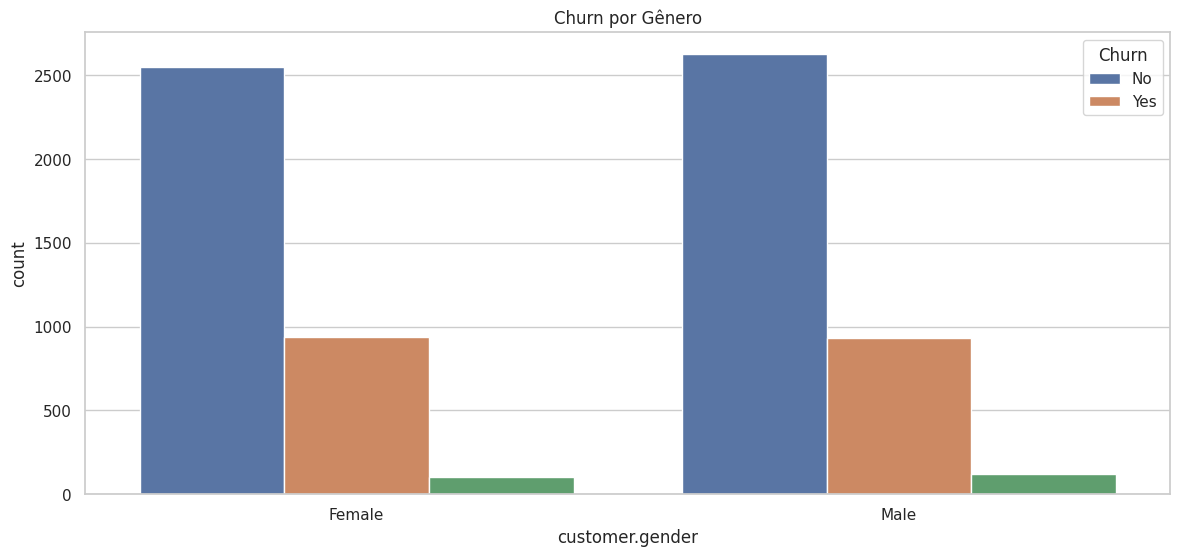

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Gênero
sns.countplot(data=df, x='customer.gender', hue='Churn')
plt.title('Churn por Gênero')
plt.show()


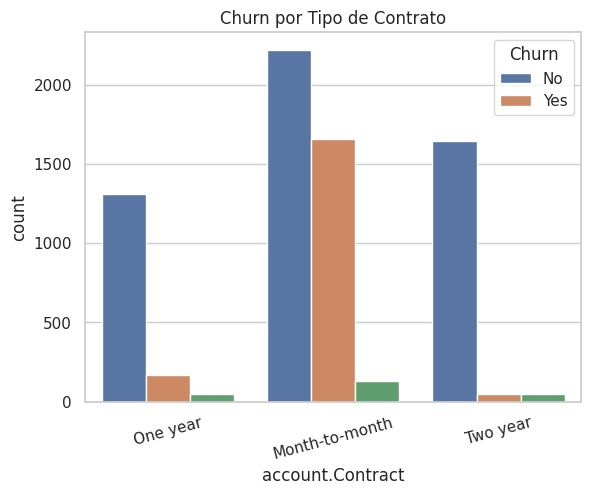

In [9]:
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=15)
plt.show()


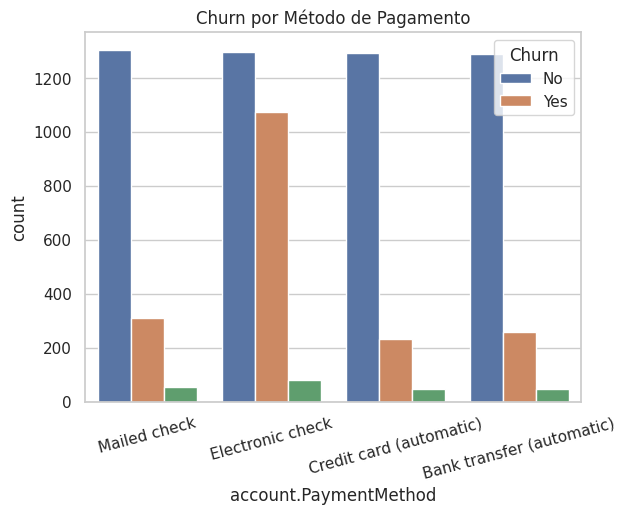

In [10]:
sns.countplot(data=df, x='account.PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=15)
plt.show()


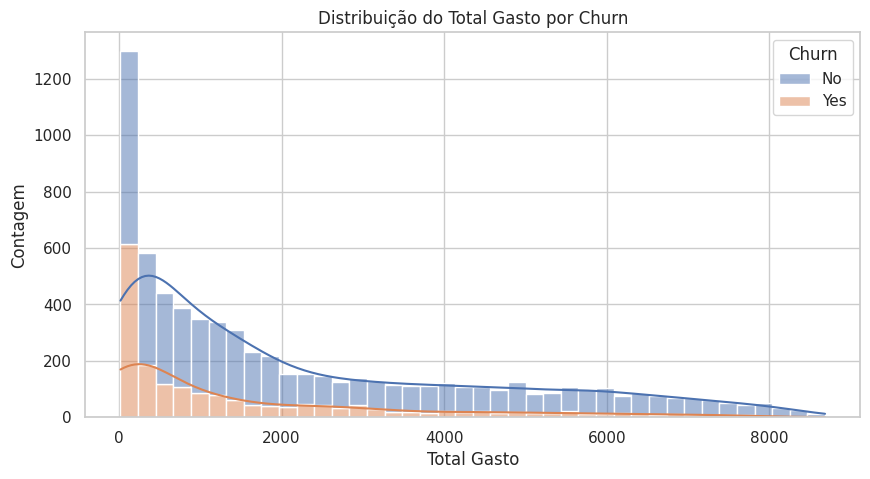

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição do Total Gasto por Churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='account.Charges.Total', hue='Churn', bins=40, kde=True, multiple='stack')
plt.title('Distribuição do Total Gasto por Churn')
plt.xlabel('Total Gasto')
plt.ylabel('Contagem')
plt.show()


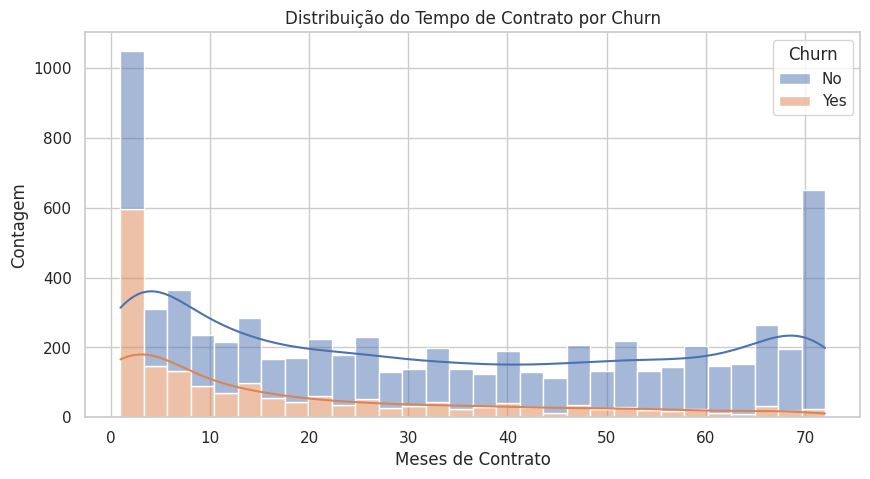

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='customer.tenure', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Contagem')
plt.show()


#📄Relatorio Final

# 📄 Relatório Final - Análise de Evasão de Clientes (Churn) | Telecom X

---

## 🎯 Introdução

A Telecom X enfrenta um elevado índice de cancelamentos de clientes, fenômeno conhecido como **Churn**. Esse problema impacta diretamente na receita da empresa, além de afetar a fidelização. O objetivo deste projeto foi realizar uma análise detalhada dos dados dos clientes da Telecom X para compreender os principais fatores que influenciam o cancelamento de serviços e, com base nisso, propor estratégias para aumentar a retenção.

---

## 🧹 Limpeza e Tratamento de Dados

1. Os dados foram extraídos de um arquivo JSON contendo informações aninhadas.
2. Utilizamos `pandas.json_normalize` para transformar o conteúdo em um DataFrame plano.
3. Foram identificados e removidos registros com:
   - Valor ausente na variável **Churn**.
   - Dados inválidos ou nulos nas colunas financeiras.
4. A coluna `account.Charges.Total` foi convertida de texto para **float**.
5. Criamos a nova coluna Contas_Diarias a partir da divisão da variável account.Charges.Monthly por 30, para obter o valor proporcional diário de cobrança e facilitar comparações entre clientes com diferentes perfis.



---

## 📊 Análise Exploratória de Dados

### 🔢 Análise Descritiva
- A maioria dos clientes **não cancelou** os serviços.
- A média de **tempo de contrato** dos clientes é de aproximadamente 32 meses.
- Clientes com maior gasto mensal apresentam maior propensão ao churn.

### 📈 Evasão por Variáveis Categóricas

- **Tipo de contrato**: clientes com **contratos mensais** têm maior taxa de churn.
- **Método de pagamento**: o uso de **Electronic Check** está fortemente relacionado à evasão.
- **InternetService**: usuários de **Fiber Optic** tendem a cancelar mais do que os de DSL.

### 📊 Evasão por Variáveis Numéricas

- Clientes com **baixo tempo de permanência** (tenure) cancelam com mais frequência.
- Clientes que gastaram pouco no total (`TotalCharges`) geralmente cancelaram nos primeiros meses.
- A nova métrica `Contas_Diarias` mostrou maior churn em clientes que pagam mais por dia.

---

## 💡 Conclusões e Insights

- **Churn é mais comum entre clientes novos**, com menos de 12 meses de contrato.
- **Contratos mensais** são um forte indicativo de propensão à evasão.
- Clientes que usam **formas de pagamento não automáticas** (ex: boleto) também são mais propensos a cancelar.
- Serviços adicionais como **suporte técnico e segurança online** podem ajudar a reter clientes.

---

## ✅ Recomendações

1. **Incentivar contratos anuais ou bienais** com descontos progressivos.
2. **Oferecer benefícios no início do relacionamento** com o cliente (primeiros 12 meses).
3. **Campanhas de migração para pagamento automático** (como débito ou cartão).
4. Promover **combos com serviços extras**, como suporte e segurança, que contribuem para retenção.
5. **Monitorar de perto clientes com baixo tenure** e faturamento alto por dia — esse grupo é vulnerável.

---

📌 Com essa análise, a equipe de Data Science poderá seguir para a etapa de modelagem preditiva, utilizando os insights extraídos aqui para prever quais clientes têm maior risco de cancelamento.

